# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [66]:
# you are free to use any package you deem fit
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## Dataset

In [ ]:
# DO NOT MODIFY
from sklearn.datasets import make_moons

X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)

## Training

In [67]:
#start with k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## Testing / Optimization

In [68]:
knn_pred = knn.predict(X_test)

In [69]:
print("With k=1:")
print("Confusion matrix:")
print(confusion_matrix(y_test, knn_pred))
print("Classification report:")
print(classification_report(y_test, knn_pred))

With k=1:
Confusion matrix:
[[  9   6]
 [  1 134]]
Classification report:
              precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.96      0.99      0.97       135

    accuracy                           0.95       150
   macro avg       0.93      0.80      0.85       150
weighted avg       0.95      0.95      0.95       150



In [70]:
#train models with different k values to find better k value
error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

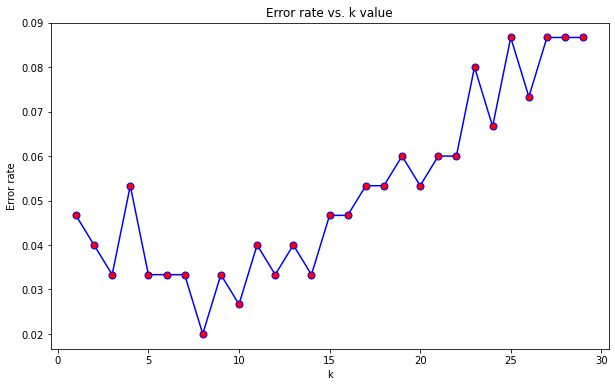

In [71]:
#plot the values with the error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', marker='o',
         markerfacecolor='red', markersize=7)
plt.title('Error rate vs. k value')
plt.xlabel('k')
plt.ylabel('Error rate')

In [72]:
#error rate seems to be smallest at 8, retrain with k = 8
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

## Performance Analysis

In [73]:
print("With k=8:")
print("Confusion matrix:")
print(confusion_matrix(y_test, knn_pred))
print("Classification report:")
print(classification_report(y_test, knn_pred))

With k=8:
Confusion matrix:
[[ 12   3]
 [  0 135]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.98      1.00      0.99       135

    accuracy                           0.98       150
   macro avg       0.99      0.90      0.94       150
weighted avg       0.98      0.98      0.98       150



When using a model with n_neighbors=1, there was 9 true negatives, 6 false positives, 1 false negative, and 134 true positives. The classification report showed a pretty high precision, recall, and F1-score for class 1, but performance was lower for class 0, especially recall. Overall accuracy of 95% indicates the model can make correct predictions. The weighted averages are pretty high which shows the model performs well across the whole dataset. After training more models with different k-values and plotting them with the error rates, it showed that error was lowest when k=8. After retraining the model with n_neighbors=8, the results showed improvement. There was 12 true negatives, 135 true positives, 3 false positives, and 0 false negatives. Precision, recall, and F1-score were all higher, and accuracy and weighted averages were very high as well. 